In [1]:
pip install openpyxl


In [2]:
import pandas as pd
import openpyxl
df = pd.read_excel('Kickstarter.xlsx')
df.head()

,id,name,goal,pledged,state,disable_communication,country,currency,deadline,state_changed_at,...,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,main_category,staff_pick.1,show_feature_image,video
0,22292,Golgotha - A Feature Film,5500,5530.0,successful,False,US,USD,2017-07-09 04:59:00,2017-07-09 04:59:01,...,2011,23,6,3,2017,16,Film & Video,False,False,True
1,82234,Vinca is opening a storefront!,10000,11045.0,successful,False,US,USD,2018-10-25 14:29:30,2018-10-25 14:29:32,...,2012,21,9,25,2018,14,Fashion,False,False,True
2,86478,The next Paul Jacobsen & The Madison Arm album!,8500,10556.0,successful,False,US,USD,2019-05-05 16:37:46,2019-05-05 16:37:46,...,2012,22,4,5,2019,16,Music,False,False,True
3,127446,Erin Heist First Full-Length Album,5000,5816.0,successful,False,US,USD,2021-11-25 21:00:14,2021-11-25 21:00:14,...,2012,22,10,26,2021,20,Music,False,False,True
4,151612,Earth Day Heritage: A Celebration in Music and...,15000,2361.0,failed,False,US,USD,2021-04-15 21:22:00,2021-04-15 21:22:00,...,2012,21,3,15,2021,19,Music,False,False,True


# Data cleaning and preprocessing

In [3]:
#Just keep successful and failed satates
df_dropped = df[df['state'].isin(['successful', 'failed'])]
df_dropped['state'].value_counts()
df_dropped.dropna(inplace = True)
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14185 entries, 0 to 15214
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        14185 non-null  int64         
 1   name                      14185 non-null  object        
 2   goal                      14185 non-null  int64         
 3   pledged                   14185 non-null  float64       
 4   state                     14185 non-null  object        
 5   disable_communication     14185 non-null  bool          
 6   country                   14185 non-null  object        
 7   currency                  14185 non-null  object        
 8   deadline                  14185 non-null  datetime64[ns]
 9   state_changed_at          14185 non-null  datetime64[ns]
 10  created_at                14185 non-null  datetime64[ns]
 11  launched_at               14185 non-null  datetime64[ns]
 12  staff_pick             

C:\Users\Behzad\AppData\Local\Temp\ipykernel_10372\2445631943.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped.dropna(inplace = True)


In [4]:
#column names

df_dropped.columns

Index(['id', 'name', 'goal', 'pledged', 'state', 'disable_communication',
       'country', 'currency', 'deadline', 'state_changed_at', 'created_at',
       'launched_at', 'staff_pick', 'backers_count', 'static_usd_rate',
       'usd_pledged', 'category', 'spotlight', 'name_len', 'name_len_clean',
       'blurb_len', 'blurb_len_clean', 'deadline_weekday',
       'state_changed_at_weekday', 'created_at_weekday', 'launched_at_weekday',
       'deadline_month', 'deadline_day', 'deadline_yr', 'deadline_hr',
       'state_changed_at_month', 'state_changed_at_day', 'state_changed_at_yr',
       'state_changed_at_hr', 'created_at_month', 'created_at_day',
       'created_at_yr', 'created_at_hr', 'launched_at_month',
       'launched_at_day', 'launched_at_yr', 'launched_at_hr', 'main_category',
       'staff_pick.1', 'show_feature_image', 'video'],
      dtype='object')

In [5]:
#The model should only use the predictors that are available at the moment when a new project is launched.

Columns_to_keep = ['name','goal','state', 'disable_communication',
       'country', 'currency','deadline', 'created_at',
       'launched_at','static_usd_rate','category', 'name_len_clean',
        'blurb_len_clean', 'deadline_weekday','created_at_weekday', 'launched_at_weekday',
       'deadline_month', 'deadline_day', 'deadline_yr', 'deadline_hr', 'created_at_month', 'created_at_day',
       'created_at_yr', 'created_at_hr', 'launched_at_month',
       'launched_at_day', 'launched_at_yr', 'launched_at_hr', 'main_category', 'show_feature_image', 'video']

df_relevant = df_dropped[Columns_to_keep]
df_relevant.head()

,name,goal,state,disable_communication,country,currency,deadline,created_at,launched_at,static_usd_rate,...,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,main_category,show_feature_image,video
0,Golgotha - A Feature Film,5500,successful,False,US,USD,2017-07-09 04:59:00,2011-02-01 23:25:17,2017-06-03 16:05:54,1.0,...,1,2011,23,6,3,2017,16,Film & Video,False,True
1,Vinca is opening a storefront!,10000,successful,False,US,USD,2018-10-25 14:29:30,2012-02-28 21:10:07,2018-09-25 14:29:30,1.0,...,28,2012,21,9,25,2018,14,Fashion,False,True
2,The next Paul Jacobsen & The Madison Arm album!,8500,successful,False,US,USD,2019-05-05 16:37:46,2012-03-01 22:06:25,2019-04-05 16:37:46,1.0,...,1,2012,22,4,5,2019,16,Music,False,True
3,Erin Heist First Full-Length Album,5000,successful,False,US,USD,2021-11-25 21:00:14,2012-04-03 22:44:17,2021-10-26 20:00:14,1.0,...,3,2012,22,10,26,2021,20,Music,False,True
4,Earth Day Heritage: A Celebration in Music and...,15000,failed,False,US,USD,2021-04-15 21:22:00,2012-04-20 21:06:46,2021-03-15 19:42:17,1.0,...,20,2012,21,3,15,2021,19,Music,False,True


In [6]:
#cleand the data

#Convert goal to USD
df_relevant['goal_usd'] = df_relevant['goal'] * df_relevant['static_usd_rate']

#Calculate launch_deadline
df_relevant['launch_to_deadline'] = df_relevant['deadline'] - df_relevant['launched_at']

#Calculate launch_created
df_relevant['created_to_launch'] = df_relevant['launched_at'] - df_relevant['created_at']

df_relevant[['goal', 'static_usd_rate', 'goal_usd', 'launched_at', 'deadline', 'launch_to_deadline', 'created_at', 'created_to_launch']].head()

#Now drop the unnecessary columns
df_clean = df_relevant.drop(['goal', 'static_usd_rate', 'launched_at', 'deadline', 'created_at','name','currency'], axis = 1)
df_clean.head()

C:\Users\Behzad\AppData\Local\Temp\ipykernel_10372\2110557813.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['goal_usd'] = df_relevant['goal'] * df_relevant['static_usd_rate']
C:\Users\Behzad\AppData\Local\Temp\ipykernel_10372\2110557813.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['launch_to_deadline'] = df_relevant['deadline'] - df_relevant['launched_at']
C:\Users\Behzad\AppData\Local\Temp\ipykernel_10372\2110557813.py:10: SettingWithCopyWarning: 
A value is trying to b

,state,disable_communication,country,category,name_len_clean,blurb_len_clean,deadline_weekday,created_at_weekday,launched_at_weekday,deadline_month,...,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,main_category,show_feature_image,video,goal_usd,launch_to_deadline,created_to_launch
0,successful,False,US,Thrillers,3,20,Sunday,Tuesday,Saturday,7,...,6,3,2017,16,Film & Video,False,True,5500.0,35 days 12:53:06,2313 days 16:40:37
1,successful,False,US,Jewelry,4,23,Thursday,Tuesday,Tuesday,10,...,9,25,2018,14,Fashion,False,True,10000.0,30 days 00:00:00,2400 days 17:19:23
2,successful,False,US,Country & Folk,6,13,Sunday,Thursday,Friday,5,...,4,5,2019,16,Music,False,True,8500.0,30 days 00:00:00,2590 days 18:31:21
3,successful,False,US,Country & Folk,5,14,Thursday,Tuesday,Tuesday,11,...,10,26,2021,20,Music,False,True,5000.0,30 days 01:00:00,3492 days 21:15:57
4,failed,False,US,Classical Music,9,18,Thursday,Friday,Monday,4,...,3,15,2021,19,Music,False,True,15000.0,31 days 01:39:43,3250 days 22:35:31


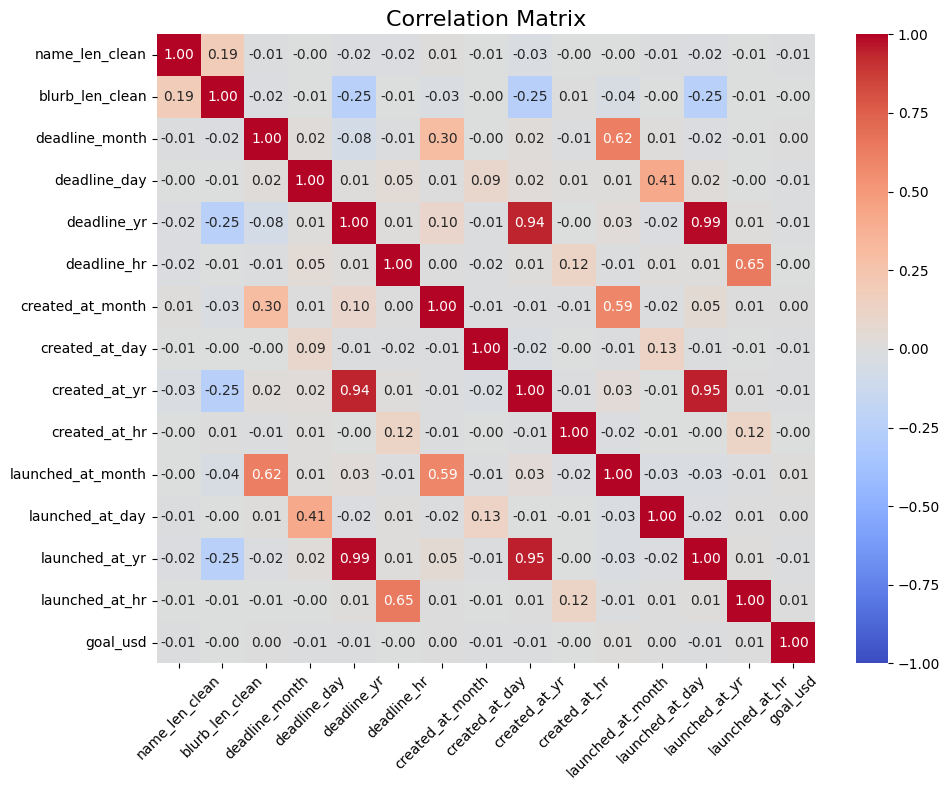

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Just keep numerical columns
df_corr = df_clean.select_dtypes(include = ['int64', 'float64'])

# Assuming 'df' is your DataFrame
# Step 1: Calculate the correlation matrix
correlation_matrix = df_corr.corr()

# Step 2: Plot the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)

# Add titles and labels
plt.title("Correlation Matrix", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Display the plot
plt.show()


In [8]:
#Based on the plot I saw colinearity between month and year of launch and created_at and deadline, I just kep launch
#Also since we want to predict the state at the time to launch having the absolute values of time does not help, just the time between launch and deadline that we save already is enough
#We just kep the weekday, hr and month of launch and deadline since it may have an effect
df_clean.drop(columns = ['launched_at_day', 'launched_at_yr', 'deadline_day', 'deadline_yr',
               'created_at_month', 'created_at_day', 'created_at_yr', 'created_at_hr'], axis = 1, inplace = True)
df_clean.head()


,state,disable_communication,country,category,name_len_clean,blurb_len_clean,deadline_weekday,created_at_weekday,launched_at_weekday,deadline_month,deadline_hr,launched_at_month,launched_at_hr,main_category,show_feature_image,video,goal_usd,launch_to_deadline,created_to_launch
0,successful,False,US,Thrillers,3,20,Sunday,Tuesday,Saturday,7,4,6,16,Film & Video,False,True,5500.0,35 days 12:53:06,2313 days 16:40:37
1,successful,False,US,Jewelry,4,23,Thursday,Tuesday,Tuesday,10,14,9,14,Fashion,False,True,10000.0,30 days 00:00:00,2400 days 17:19:23
2,successful,False,US,Country & Folk,6,13,Sunday,Thursday,Friday,5,16,4,16,Music,False,True,8500.0,30 days 00:00:00,2590 days 18:31:21
3,successful,False,US,Country & Folk,5,14,Thursday,Tuesday,Tuesday,11,21,10,20,Music,False,True,5000.0,30 days 01:00:00,3492 days 21:15:57
4,failed,False,US,Classical Music,9,18,Thursday,Friday,Monday,4,21,3,19,Music,False,True,15000.0,31 days 01:39:43,3250 days 22:35:31


In [9]:
#Check numerical variables
df_clean.describe()

,name_len_clean,blurb_len_clean,deadline_month,deadline_hr,launched_at_month,launched_at_hr,goal_usd,launch_to_deadline,created_to_launch
count,14185.000000,14185.000000,14185.000000,14185.000000,14185.000000,14185.000000,1.418500e+04,14185,14185
mean,5.004089,14.995206,6.596405,12.719774,6.276137,13.458795,4.598967e+04,33 days 22:27:54.949312654,66 days 05:38:47.847091998
std,2.284351,5.449000,3.383948,6.906796,3.401372,6.400669,1.449953e+06,12 days 23:58:09.064614945,206 days 13:31:36.240477852
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,7.603898e-01,1 days 00:00:00,0 days 00:10:10
25%,3.000000,11.000000,4.000000,6.000000,3.000000,9.000000,1.374000e+03,29 days 23:00:00,4 days 00:37:36
50%,5.000000,16.000000,7.000000,14.000000,6.000000,15.000000,5.000000e+03,30 days 00:00:00,14 days 01:02:38
75%,7.000000,19.000000,10.000000,18.000000,9.000000,18.000000,1.300000e+04,38 days 00:00:00,45 days 01:34:21
max,14.000000,28.000000,12.000000,23.000000,12.000000,23.000000,1.182690e+08,120 days 14:09:09,3899 days 13:48:54


In [10]:
#Check for multicolinarity

#Keeping only numeric columns
X_num = df_clean.select_dtypes(include = ['int64', 'float64'])
X_num.head()

from statsmodels.tools.tools import add_constant
X1 = add_constant(X_num)
vif_data = pd.DataFrame()
vif_data["feature"] = X1.columns

from statsmodels.stats.outliers_influence import variance_inflation_factor

for i in range(len(X1.columns)):
  vif_data.loc[vif_data.index[i],"VIF"] = variance_inflation_factor(X1.values, i)
print(vif_data)

             feature        VIF
0              const  21.385971
1     name_len_clean   1.038916
2    blurb_len_clean   1.039962
3     deadline_month   1.640446
4        deadline_hr   1.717262
5  launched_at_month   1.642324
6     launched_at_hr   1.716798
7           goal_usd   1.000372


In [11]:
df_clean['state'].value_counts()

state
successful    8087
failed        6098
Name: count, dtype: int64

C:\Users\Behzad\AppData\Local\Temp\ipykernel_10372\652634719.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x=column, palette='viridis', order=df_clean[column].value_counts().index)


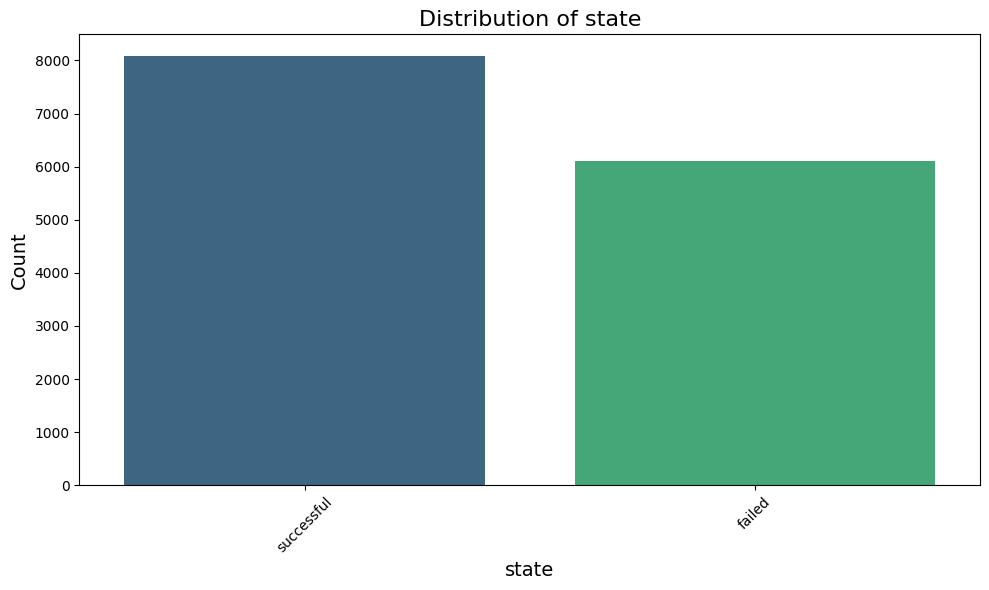

C:\Users\Behzad\AppData\Local\Temp\ipykernel_10372\652634719.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x=column, palette='viridis', order=df_clean[column].value_counts().index)


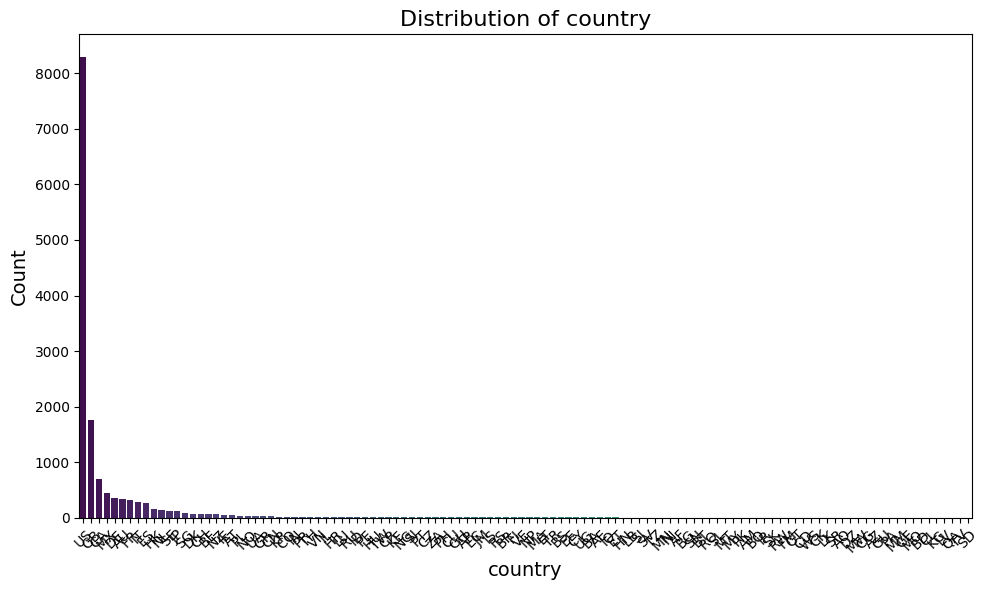

C:\Users\Behzad\AppData\Local\Temp\ipykernel_10372\652634719.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x=column, palette='viridis', order=df_clean[column].value_counts().index)


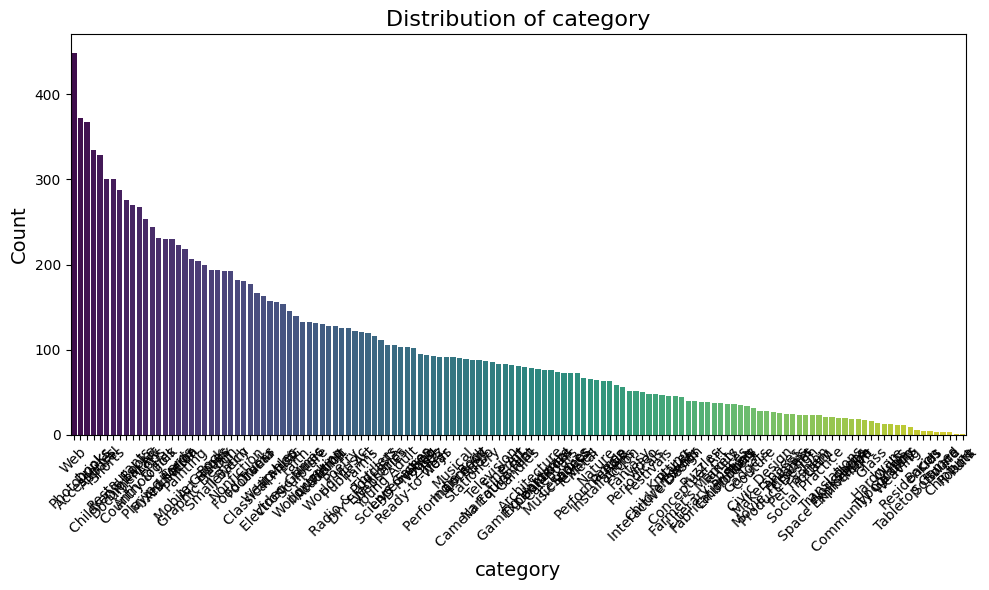

C:\Users\Behzad\AppData\Local\Temp\ipykernel_10372\652634719.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x=column, palette='viridis', order=df_clean[column].value_counts().index)


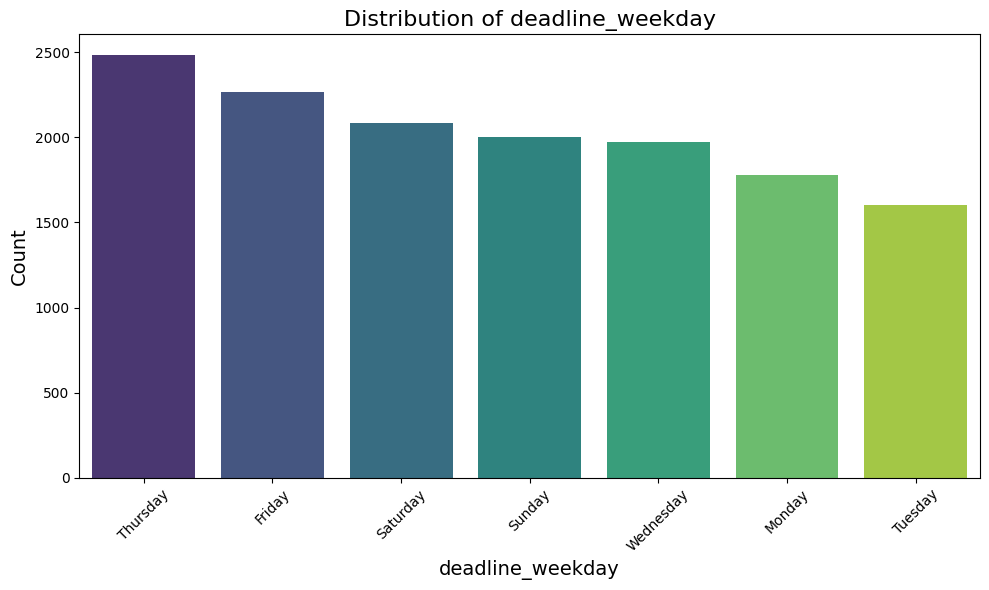

C:\Users\Behzad\AppData\Local\Temp\ipykernel_10372\652634719.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x=column, palette='viridis', order=df_clean[column].value_counts().index)


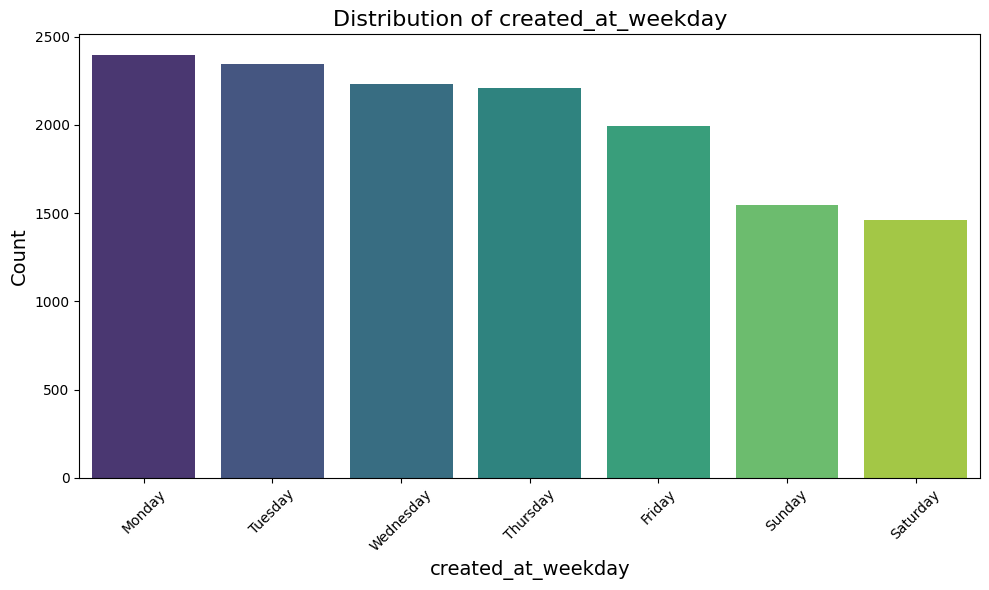

C:\Users\Behzad\AppData\Local\Temp\ipykernel_10372\652634719.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x=column, palette='viridis', order=df_clean[column].value_counts().index)


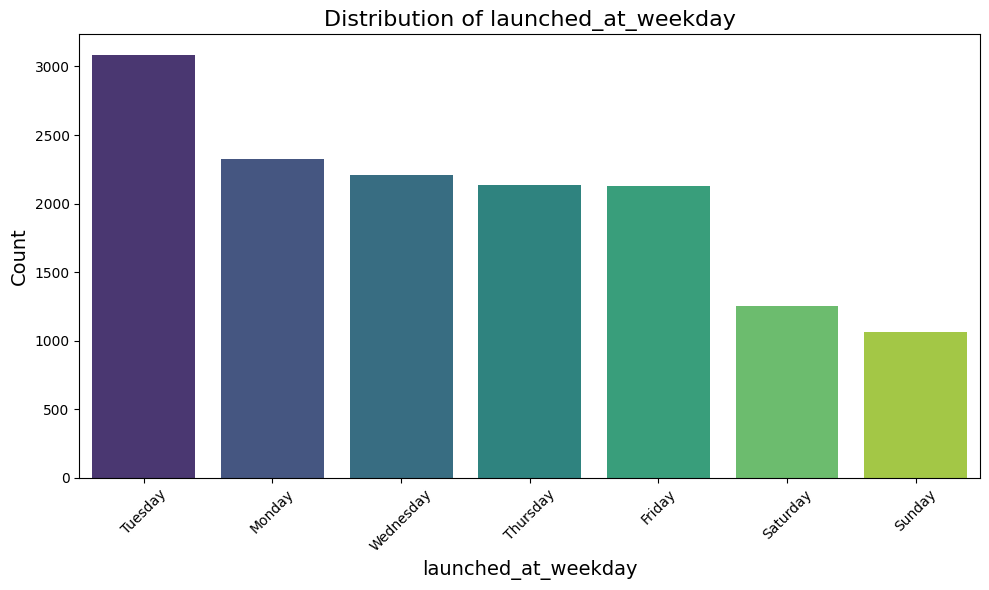

C:\Users\Behzad\AppData\Local\Temp\ipykernel_10372\652634719.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x=column, palette='viridis', order=df_clean[column].value_counts().index)


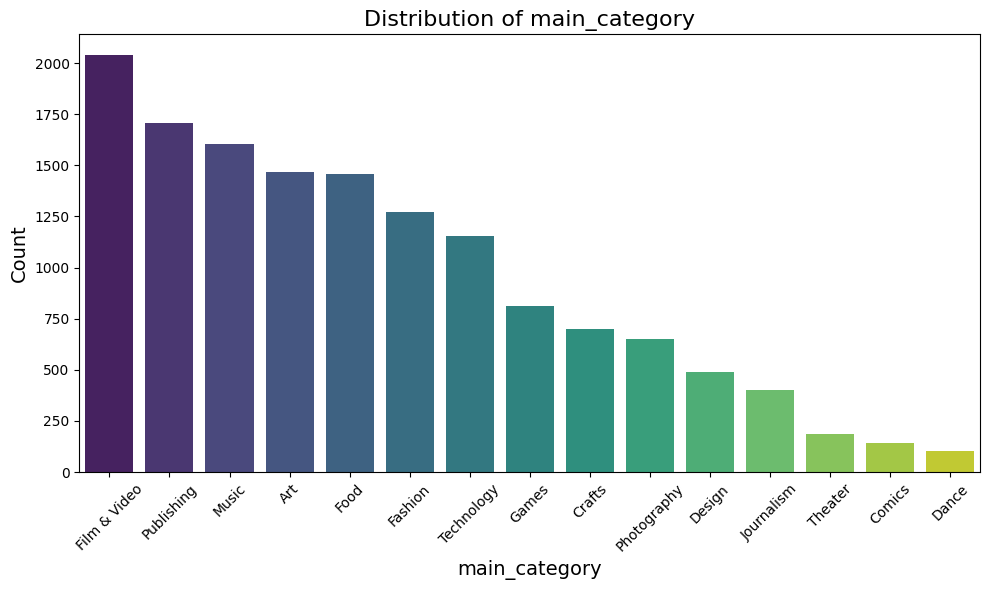

In [12]:
#Check categorical variables
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame (replace with your actual DataFrame)
# df = pd.read_csv("your_data.csv")

# Identify categorical variables
categorical_columns = df_clean.select_dtypes(include=['object', 'category']).columns

# Create a count plot for each categorical variable
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_clean, x=column, palette='viridis', order=df_clean[column].value_counts().index)
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [17]:
# Group by 'category' and count the unique 'main_category' values
category_to_main_count = df.groupby('category')['main_category'].nunique().reset_index()
category_to_main_count.columns = ['category', 'unique_main_categories']

# Check the maximum number of unique main categories for any category
max_main_categories_per_category = category_to_main_count['unique_main_categories'].max()

print("Number of unique 'main_category' values each 'category' is related to:")
check=category_to_main_count[category_to_main_count['unique_main_categories']>1]
print(check)

#Print the columns taht were connected to more than one main category
#df_clean[df_clean['category'].isin(check['category'])][['category','main_category']].drop_duplicates()
df_clean[df_clean['category'].isin(check['category'])][['category','main_category']]


Number of unique 'main_category' values each 'category' is related to:
        category  unique_main_categories
6    Anthologies                       2
23        Comedy                       4
49     Festivals                       2
123       Spaces                       2
138          Web                       2


,category,main_category
12,Festivals,Theater
48,Web,Journalism
74,Spaces,Food
87,Spaces,Food
91,Web,Journalism
...,...,...
15157,Comedy,Film & Video
15163,Web,Technology
15173,Comedy,Film & Video
15201,Spaces,Food


In [18]:
# #See the scatterplot between state and category
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Create the swarm plot
# plt.figure(figsize=(12, 6))
# sns.swarmplot(data=df_clean, x='state', y='main_category', size=5, palette='Set2')

# # Customize the plot
# plt.title('Scatter-like Visualization of State vs Category', fontsize=16)
# plt.xlabel('State', fontsize=12)
# plt.ylabel('Category', fontsize=12)
# plt.xticks(rotation=45)
# plt.tight_layout()

# # Show the plot
# plt.show()


C:\Users\Behzad\AppData\Local\Temp\ipykernel_10372\3093355814.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df_clean, x='state', y='main_category', size=5, palette='Set2')


   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------- ----------------------- 7.9/19.1 MB 40.7 MB/s eta 0:00:01
   --------------------------- ------------ 13.1/19.1 MB 31.6 MB/s eta 0:00:01
   ------------------------------------ --- 17.6/19.1 MB 27.7 MB/s eta 0:00:01
   ---------------------------------------- 19.1/19.1 MB 24.1 MB/s eta 0:00:00


c:\Users\Behzad\MMA\anaconda3\envs\workshop\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 82.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Behzad\MMA\anaconda3\envs\workshop\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 79.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


KeyboardInterrupt: 

In [19]:
#Only keep main_category and drop actegory
df_clean.drop(columns = ['category'], axis = 1, inplace = True)
df_clean.head()

,state,disable_communication,country,name_len_clean,blurb_len_clean,deadline_weekday,created_at_weekday,launched_at_weekday,deadline_month,deadline_hr,launched_at_month,launched_at_hr,main_category,show_feature_image,video,goal_usd,launch_to_deadline,created_to_launch
0,successful,False,US,3,20,Sunday,Tuesday,Saturday,7,4,6,16,Film & Video,False,True,5500.0,35 days 12:53:06,2313 days 16:40:37
1,successful,False,US,4,23,Thursday,Tuesday,Tuesday,10,14,9,14,Fashion,False,True,10000.0,30 days 00:00:00,2400 days 17:19:23
2,successful,False,US,6,13,Sunday,Thursday,Friday,5,16,4,16,Music,False,True,8500.0,30 days 00:00:00,2590 days 18:31:21
3,successful,False,US,5,14,Thursday,Tuesday,Tuesday,11,21,10,20,Music,False,True,5000.0,30 days 01:00:00,3492 days 21:15:57
4,failed,False,US,9,18,Thursday,Friday,Monday,4,21,3,19,Music,False,True,15000.0,31 days 01:39:43,3250 days 22:35:31


In [20]:
#Handling category column and keep around 10 (or below a threshhold of %1)
df_clean.shape

# Calculate the 1% threshold
threshold = df_clean.shape[0] * 0.01

# Get the value counts of 'country'
country_counts = df_clean['country'].value_counts()

# Filter countries that have more than 1% of the rows
countries_above_threshold = country_counts[country_counts > threshold]

# Display the countries and their counts
print(countries_above_threshold)

#Keep these countries and lable others as 'Other'
df_clean['country'] = df_clean['country'].apply(lambda x: x if x in countries_above_threshold.index else 'Other')
df_clean['country'].value_counts()


country
US    8289
GB    1749
CA     687
MX     448
DE     345
AU     329
FR     311
IT     279
ES     268
HK     156
Name: count, dtype: int64


country
US       8289
GB       1749
Other    1324
CA        687
MX        448
DE        345
AU        329
FR        311
IT        279
ES        268
HK        156
Name: count, dtype: int64

In [21]:
df_clean.shape

(14185, 18)

# Preparing x,Y and standatdize

In [22]:
#Seperate the dependant and independant variables
X = df_clean.drop(['state'], axis = 1)
y = df_clean['state'].apply(lambda x: 1 if x == 'successful' else 0)

In [23]:
from sklearn.preprocessing import StandardScaler

# 1. Handling Numerical Columns
numerical_cols = X.select_dtypes(include=['number', 'float64']).columns
timedelta_cols = X.select_dtypes(include=['timedelta64[ns]']).columns

# Convert timedelta to total seconds for scaling
X[timedelta_cols] = X[timedelta_cols].apply(lambda x: x.dt.total_seconds())

# Scale numerical columns
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(X[numerical_cols])
X[numerical_cols] = scaled_numerical

# 2. Handling Categorical Columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns

# Apply pd.get_dummies to generate dummy variables
X_dummified = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

X_dummified.shape

(14185, 53)

# Run Logistic Regression

In [24]:
#Since we dont have the step of hypertuning, we will just go with one step and use cross-validation for more robust analysis

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, confusion_matrix, classification_report

model = LogisticRegression()

# Cross-validation (5-folds)
scores = cross_val_score(model, X_dummified, y, cv=5, scoring='accuracy')  # You can also use scoring='f1' for F-score directly

print(f"Cross-validated accuracy scores: {scores}")
print(f"Average accuracy: {scores.mean()}")

# To get confusion matrix and F-score for each fold, you can use cross_val_predict
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(model, X_dummified, y, cv=5)

cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y, y_pred))

c:\Users\Behzad\MMA\anaconda3\envs\workshop\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Behzad\MMA\anaconda3\envs\workshop\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Cross-validated accuracy scores: [0.66302432 0.66478675 0.70567501 0.71801198 0.73634121]
Average accuracy: 0.697567853366232


c:\Users\Behzad\MMA\anaconda3\envs\workshop\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Behzad\MMA\anaconda3\envs\workshop\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Confusion Matrix:
 [[3405 2693]
 [1597 6490]]

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.56      0.61      6098
           1       0.71      0.80      0.75      8087

    accuracy                           0.70     14185
   macro avg       0.69      0.68      0.68     14185
weighted avg       0.70      0.70      0.69     14185



In [26]:
#Checked RMSE out of cusority but is not a good metric for classification problem
import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"Cross-validation RMSE: {rmse}")

Cross-validation RMSE: 0.5499383116621064


In [27]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np

# Define a range of C values (regularization strength)
C_values = np.logspace(-4, 4, 10)

# Initialize lists to store results
average_accuracies = []
average_precisions = []
average_recalls = []
average_f1_scores = []

# KFold Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop through different values of C
for C_value in C_values:
    model = LogisticRegression(penalty='l2', C=C_value, max_iter=10000)  # L2 regularization with current C value

    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    # Loop through each fold
    for train_index, test_index in kf.split(X_dummified):
        X_train, X_test = X_dummified.iloc[train_index], X_dummified.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Fit the model on the training data
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        accuracies.append(accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred, zero_division=1))
        recalls.append(recall_score(y_test, y_pred, zero_division=1))
        f1_scores.append(f1_score(y_test, y_pred, zero_division=1))

    # Calculate average metrics for this C value
    avg_accuracy = np.mean(accuracies)
    avg_precision = np.mean(precisions)
    avg_recall = np.mean(recalls)
    avg_f1_score = np.mean(f1_scores)

    average_accuracies.append(avg_accuracy)
    average_precisions.append(avg_precision)
    average_recalls.append(avg_recall)
    average_f1_scores.append(avg_f1_score)

# Find the best C based on the highest average F1 score (or another metric like accuracy)
best_C_index = np.argmax(average_f1_scores)  # You can also use np.argmax(average_accuracies) for accuracy
best_C_value = C_values[best_C_index]
best_f1_score = average_f1_scores[best_C_index]

print(f"Optimal C Value: {best_C_value}")
print(f"Best F1 Score: {best_f1_score:.4f}")

# Optionally, display metrics for each C value
for i, C_value in enumerate(C_values):
    print(f"C = {C_value:.4f} | Accuracy = {average_accuracies[i]:.4f} | Precision = {average_precisions[i]:.4f} | Recall = {average_recalls[i]:.4f} | F1 Score = {average_f1_scores[i]:.4f}")


Optimal C Value: 1291.5496650148827
Best F1 Score: 0.7676
C = 0.0001 | Accuracy = 0.5820 | Precision = 0.5775 | Recall = 0.9951 | F1 Score = 0.7308
C = 0.0008 | Accuracy = 0.6516 | Precision = 0.6397 | Recall = 0.8907 | F1 Score = 0.7446
C = 0.0060 | Accuracy = 0.6856 | Precision = 0.6831 | Recall = 0.8373 | F1 Score = 0.7522
C = 0.0464 | Accuracy = 0.6955 | Precision = 0.7017 | Recall = 0.8108 | F1 Score = 0.7522
C = 0.3594 | Accuracy = 0.6997 | Precision = 0.7085 | Recall = 0.8045 | F1 Score = 0.7534
C = 2.7826 | Accuracy = 0.7079 | Precision = 0.7145 | Recall = 0.8127 | F1 Score = 0.7604
C = 21.5443 | Accuracy = 0.7105 | Precision = 0.7153 | Recall = 0.8182 | F1 Score = 0.7632
C = 166.8101 | Accuracy = 0.7148 | Precision = 0.7184 | Recall = 0.8225 | F1 Score = 0.7668
C = 1291.5497 | Accuracy = 0.7158 | Precision = 0.7192 | Recall = 0.8231 | F1 Score = 0.7676
C = 10000.0000 | Accuracy = 0.7158 | Precision = 0.7193 | Recall = 0.8228 | F1 Score = 0.7675


In [28]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np

#model = LogisticRegression()
model = LogisticRegression(penalty='l2', C=1291)  # L2 regularization with strength of 1

# KFold Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
coefficients = []
confusion_matrices = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Loop through each fold
for train_index, test_index in kf.split(X_dummified):
    X_train, X_test = X_dummified.iloc[train_index], X_dummified.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)

    # Store the coefficients in each fold
    coefficients.append(model.coef_[0])

    y_pred = model.predict(X_test)

    confusion_matrices.append(confusion_matrix(y_test, y_pred))
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, zero_division=1))
    recalls.append(recall_score(y_test, y_pred, zero_division=1))
    f1_scores.append(f1_score(y_test, y_pred, zero_division=1))

coefficients_df = pd.DataFrame(coefficients, columns=X_dummified.columns)

# Calculate the average of the coefficients across folds
average_coefficients = coefficients_df.mean(axis=0)

# Display features with their signs and coefficients
average_coefficients_sorted = average_coefficients.sort_values(ascending=False, key=lambda x: x.abs())
print("\nLogistic Regression Coefficients:")
print(average_coefficients_sorted)

# Average metrics across folds
average_accuracy = np.mean(accuracies)
average_precision = np.mean(precisions)
average_recall = np.mean(recalls)
average_f1_score = np.mean(f1_scores)

print("\nAverage Metrics Across Folds:")
print(f"Accuracy: {average_accuracy:.4f}")
print(f"Precision: {average_precision:.4f}")
print(f"Recall: {average_recall:.4f}")
print(f"F1 Score: {average_f1_score:.4f}")


c:\Users\Behzad\MMA\anaconda3\envs\workshop\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Behzad\MMA\anaconda3\envs\workshop\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo


Logistic Regression Coefficients:
goal_usd                        -44.685901
show_feature_image_True          32.600439
main_category_Dance               3.649428
main_category_Comics              3.411693
country_IT                       -1.038192
country_HK                        0.831360
main_category_Publishing          0.817957
video_True                        0.703488
main_category_Journalism         -0.661757
main_category_Fashion             0.648856
main_category_Food               -0.644463
main_category_Music               0.576135
country_MX                       -0.565089
main_category_Games               0.536732
main_category_Film & Video        0.512343
main_category_Photography         0.477935
main_category_Technology         -0.446065
country_DE                       -0.394461
launch_to_deadline               -0.362351
country_ES                       -0.329556
country_GB                        0.320830
main_category_Design             -0.307651
name_len_clean     

c:\Users\Behzad\MMA\anaconda3\envs\workshop\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Now generalize the days of the week to weekend/weekday and predict again: skip

In [29]:
#Seperate the dependant and independant variables
X = df_clean.drop(['state'], axis = 1)
y = df_clean['state'].apply(lambda x: 1 if x == 'successful' else 0)

In [30]:

#If Sunday, Saturday then weekend, else Weekday
X['deadline_weekday'] = X['deadline_weekday'].apply(lambda x: 0 if x in ['Saturday','Sunday'] else 1)
X['launched_at_weekday'] = X['deadline_weekday'].apply(lambda x: 0 if x in ['Saturday','Sunday'] else 1)
X['created_at_weekday'] = X['deadline_weekday'].apply(lambda x: 0 if x in ['Saturday','Sunday'] else 1)
X.head()

,disable_communication,country,name_len_clean,blurb_len_clean,deadline_weekday,created_at_weekday,launched_at_weekday,deadline_month,deadline_hr,launched_at_month,launched_at_hr,main_category,show_feature_image,video,goal_usd,launch_to_deadline,created_to_launch
0,False,US,3,20,0,1,1,7,4,6,16,Film & Video,False,True,5500.0,35 days 12:53:06,2313 days 16:40:37
1,False,US,4,23,1,1,1,10,14,9,14,Fashion,False,True,10000.0,30 days 00:00:00,2400 days 17:19:23
2,False,US,6,13,0,1,1,5,16,4,16,Music,False,True,8500.0,30 days 00:00:00,2590 days 18:31:21
3,False,US,5,14,1,1,1,11,21,10,20,Music,False,True,5000.0,30 days 01:00:00,3492 days 21:15:57
4,False,US,9,18,1,1,1,4,21,3,19,Music,False,True,15000.0,31 days 01:39:43,3250 days 22:35:31


In [31]:
from sklearn.preprocessing import StandardScaler

# 1. Handling Numerical Columns
numerical_cols = X.select_dtypes(include=['number', 'float64']).columns
timedelta_cols = X.select_dtypes(include=['timedelta64[ns]']).columns

# Convert timedelta to total seconds for scaling
X[timedelta_cols] = X[timedelta_cols].apply(lambda x: x.dt.total_seconds())

# Scale numerical columns #Z-score standardization
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(X[numerical_cols])
X[numerical_cols] = scaled_numerical

# 2. Handling Categorical Columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns

# Apply pd.get_dummies to generate dummy variables
X_dummified = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

X_dummified.shape

(14185, 38)

In [32]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np

# Initialize the model
model = LogisticRegression()

# KFold Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
coefficients = []
confusion_matrices = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Loop through each fold
for train_index, test_index in kf.split(X_dummified):
    X_train, X_test = X_dummified.iloc[train_index], X_dummified.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Store the coefficients
    coefficients.append(model.coef_[0])

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    confusion_matrices.append(confusion_matrix(y_test, y_pred))
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, zero_division=1))
    recalls.append(recall_score(y_test, y_pred, zero_division=1))
    f1_scores.append(f1_score(y_test, y_pred, zero_division=1))

# Convert coefficients into a DataFrame for easy reading
coefficients_df = pd.DataFrame(coefficients, columns=X_dummified.columns)

# Calculate the average of the coefficients across folds
average_coefficients = coefficients_df.mean(axis=0)

# Calculate the coefficient matrix
coefficient_matrix = coefficients_df.corr()

# Sort average coefficients by their absolute values
top_20_features = average_coefficients.abs().sort_values(ascending=False).head(38)

# Average metrics across folds
average_accuracy = np.mean(accuracies)
average_precision = np.mean(precisions)
average_recall = np.mean(recalls)
average_f1_score = np.mean(f1_scores)

# Display results
print("\nTop 10 Features by Absolute Coefficient:")
print(average_coefficients.loc[top_20_features.index])

print("\nAverage Metrics Across Folds:")
print(f"Accuracy: {average_accuracy:.4f}")
print(f"Precision: {average_precision:.4f}")
print(f"Recall: {average_recall:.4f}")
print(f"F1 Score: {average_f1_score:.4f}")



Top 10 Features by Absolute Coefficient:
goal_usd                     -10.601707
show_feature_image_True        4.131288
main_category_Comics           1.886657
main_category_Dance            1.726098
country_IT                    -1.125491
main_category_Food            -0.914327
country_HK                     0.853830
main_category_Journalism      -0.796888
main_category_Publishing       0.735173
main_category_Technology      -0.712868
video_True                     0.585441
country_MX                    -0.546008
main_category_Fashion          0.521905
main_category_Music            0.499679
main_category_Design          -0.491654
country_DE                    -0.463533
country_ES                    -0.441781
launch_to_deadline            -0.401691
main_category_Photography      0.341316
main_category_Games            0.336660
main_category_Film & Video     0.310456
main_category_Crafts          -0.214653
country_GB                     0.204161
name_len_clean                 0.19092

c:\Users\Behzad\MMA\anaconda3\envs\workshop\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Behzad\MMA\anaconda3\envs\workshop\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

# Use KNN to predict state

In [33]:
#I will change the threshhold later in a loop to see with which set of selected feautures this would run better
#For now we will just set it to all features

In [34]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dummified, y, test_size = 0.3, random_state = 5)

# Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [35]:
# Build a KNN model with k=3 using Euclidean distance function
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,p=2)
model = knn.fit(scaled_X_train,y_train)
y_test_pred = model.predict(scaled_X_test)

# Make predictions and evaluate
#accuracy
from sklearn.metrics import accuracy_score
accuracy_knn = accuracy_score(y_test, y_test_pred)
#recall
from sklearn.metrics import recall_score
recall_knn = recall_score(y_test, y_test_pred)
#precision
from sklearn.metrics import precision_score
precision_knn = precision_score(y_test, y_test_pred)
#F1score
from sklearn.metrics import f1_score
f1_knn = f1_score(y_test, y_test_pred)

print(f'''Performance Metrics of KNN:
Accuracy: {accuracy_knn}
Precision: {precision_knn}
Recall: {recall_knn}
F1 Score: {f1_knn}''')


Performance Metrics of KNN:
Accuracy: 0.6447368421052632
Precision: 0.6843326885880078
Recall: 0.7176470588235294
F1 Score: 0.7005940594059406


In [36]:
# Define ranges for thresholds and k values and loop through them later
threshold_range = np.arange(0, 0.5, 0.05)
k_values = np.arange(10, 40, 5)

# Initialize variables to track optimal values
best_f1 = -1
best_accuracy = -1
best_threshold = None
best_k = None

# Nested loop to test thresholds and k values
for threshold in threshold_range:
    # Select only the features that have an importance above threshold
    important_features = average_coefficients[average_coefficients.abs() > threshold]
    important_features_sorted = important_features.sort_values(ascending=False, key=lambda x: x.abs())

    # Just keep the selected feautures selected features
    X_selected = X_dummified[important_features_sorted.index]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_selected)

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)

        knn_accuracies = []
        knn_f1_scores = []

        for train_index, test_index in kf.split(X_scaled):
            X_train, X_test = X_scaled[train_index], X_scaled[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            knn.fit(X_train, y_train)

            # Predict and evaluate
            y_pred = knn.predict(X_test)
            knn_accuracies.append(accuracy_score(y_test, y_pred))
            knn_f1_scores.append(f1_score(y_test, y_pred, zero_division=1))

        avg_accuracy = np.mean(knn_accuracies)
        avg_f1 = np.mean(knn_f1_scores)

        # Check for optimal configuration
        if avg_f1 > best_f1:
            best_f1 = avg_f1
            best_accuracy = avg_accuracy
            best_threshold = threshold
            best_k = k

print(f"Optimal Threshold: {best_threshold}")
print(f"Optimal k: {best_k}")
print(f"Best F1-Score: {best_f1:.4f}")
print(f"Best Accuracy: {best_accuracy:.4f}")


Optimal Threshold: 0.35000000000000003
Optimal k: 35
Best F1-Score: 0.7581
Best Accuracy: 0.7011


# Use random forest classifier

In [37]:
#Seperate the dependant and independant variables
X = df_clean.drop(['state'], axis = 1)
y = df_clean['state'].apply(lambda x: 1 if x == 'successful' else 0)

In [38]:
from sklearn.preprocessing import StandardScaler

# 1. Handling Numerical Columns
numerical_cols = X.select_dtypes(include=['number', 'float64']).columns
timedelta_cols = X.select_dtypes(include=['timedelta64[ns]']).columns

# Convert timedelta to total seconds for scaling
X[timedelta_cols] = X[timedelta_cols].apply(lambda x: x.dt.total_seconds())

# Scale numerical columns
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(X[numerical_cols])
X[numerical_cols] = scaled_numerical

# 2. Handling Categorical Columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns

# Apply pd.get_dummies to generate dummy variables
X_dummified = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

X_dummified.shape

(14185, 53)

In [39]:
# from sklearn.ensemble import RandomForestClassifier

# #Split the dataset
# X_train, X_test, y_train, y_test = train_test_split(X_dummified, y, test_size=0.3, random_state=42)

# # Build and fit the RandomForest model
# rf = RandomForestClassifier(random_state=0)
# model_rf = rf.fit(X_train, y_train)

# # Predict on the test set and calculate precision
# y_test_pred = model_rf.predict(X_test)

# #accuracy
# accuracy_rf = accuracy_score(y_test, y_test_pred)
# print("Accuracy on test set: ", accuracy_rf)
# #percision
# precision_rf = precision_score(y_test, y_test_pred)
# print("Precision on test set: ", precision_rf)
# #recall
# recall_rf = recall_score(y_test, y_test_pred)
# print("Recall on test set: ", recall_rf)
# #f1score
# f1_rf = f1_score(y_test, y_test_pred)
# print("F1 Score on test set: ", f1_rf)

# # Get the top 20 features based on their importance
# top_20_features = pd.Series(model_rf.feature_importances_, index=X_dummified.columns).sort_values(ascending=False).head(20)

# # Plot the top 20 feature importances
# top_20_features.plot(kind='bar', figsize=(14,6))
# plt.title("Top 20 Feature Importances")
# plt.show()


In [40]:
#Hypertuning the random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_dummified, y, test_size=0.3, random_state=42)

# Define the parameter grid for RandomForest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Perform GridSearchCV
rf = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Retrieve the best model
best_rf = grid_search.best_estimator_

# Predict on the test set and calculate metrics
y_test_pred = best_rf.predict(X_test)

#Print the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Accuracy
accuracy_rf = accuracy_score(y_test, y_test_pred)
print("Accuracy on test set: ", accuracy_rf)

# Precision
precision_rf = precision_score(y_test, y_test_pred)
print("Precision on test set: ", precision_rf)

# Recall
recall_rf = recall_score(y_test, y_test_pred)
print("Recall on test set: ", recall_rf)

# F1 Score
f1_rf = f1_score(y_test, y_test_pred)
print("F1 Score on test set: ", f1_rf)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy on test set:  0.7265037593984962
Precision on test set:  0.7055442866801893
Recall on test set:  0.876890756302521
F1 Score on test set:  0.7819408017984264


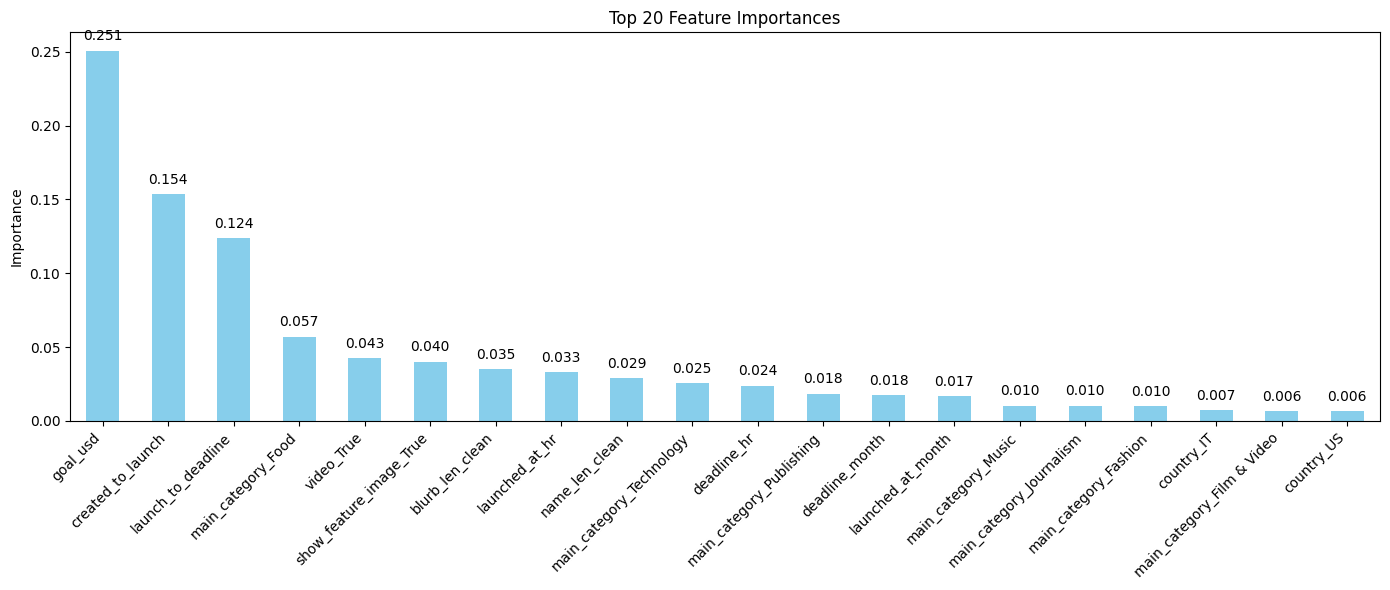

In [41]:
import matplotlib.pyplot as plt

# Get the top 20 features based on their importance
top_20_features = pd.Series(best_rf.feature_importances_, index=X_dummified.columns).sort_values(ascending=False).head(20)

# Plot the top 20 feature importances
plt.figure(figsize=(14, 6))
ax = top_20_features.plot(kind='bar', color='skyblue')

# Add importance values above each bar
for i, v in enumerate(top_20_features.values):
    ax.text(i, v + 0.005, f"{v:.3f}", ha='center', va='bottom', fontsize=10)

plt.title("Top 20 Feature Importances")
plt.ylabel("Importance")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Clustering the projects + finding optimal number of cluster

In [42]:
!pip install kmodes

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score

In [44]:
#Just keep successful and failed satates
df_dropped = df[df['state'].isin(['successful', 'failed'])]
df_dropped['state'].value_counts()
df_dropped.dropna(inplace = True)
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14185 entries, 0 to 15214
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        14185 non-null  int64         
 1   name                      14185 non-null  object        
 2   goal                      14185 non-null  int64         
 3   pledged                   14185 non-null  float64       
 4   state                     14185 non-null  object        
 5   disable_communication     14185 non-null  bool          
 6   country                   14185 non-null  object        
 7   currency                  14185 non-null  object        
 8   deadline                  14185 non-null  datetime64[ns]
 9   state_changed_at          14185 non-null  datetime64[ns]
 10  created_at                14185 non-null  datetime64[ns]
 11  launched_at               14185 non-null  datetime64[ns]
 12  staff_pick             

C:\Users\Behzad\AppData\Local\Temp\ipykernel_10372\2445631943.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped.dropna(inplace = True)


In [ ]:
df_dropped.columns

Index(['id', 'name', 'goal', 'pledged', 'state', 'disable_communication',
       'country', 'currency', 'deadline', 'state_changed_at', 'created_at',
       'launched_at', 'staff_pick', 'backers_count', 'static_usd_rate',
       'usd_pledged', 'category', 'spotlight', 'name_len', 'name_len_clean',
       'blurb_len', 'blurb_len_clean', 'deadline_weekday',
       'state_changed_at_weekday', 'created_at_weekday', 'launched_at_weekday',
       'deadline_month', 'deadline_day', 'deadline_yr', 'deadline_hr',
       'state_changed_at_month', 'state_changed_at_day', 'state_changed_at_yr',
       'state_changed_at_hr', 'created_at_month', 'created_at_day',
       'created_at_yr', 'created_at_hr', 'launched_at_month',
       'launched_at_day', 'launched_at_yr', 'launched_at_hr', 'main_category',
       'staff_pick.1', 'show_feature_image', 'video'],
      dtype='object')

In [45]:
#I assumed that we do not need to only keep the relevant columns at the time of launch and I used the whole dataset for clustering

#cleaning the data

#Convert goal to USD
df_dropped['usd_goal'] = df_dropped['goal'] * df_dropped['static_usd_rate']

#Calculate launch_deadline to days
df_dropped['launch_to_deadline'] = df_dropped['deadline'] - df_dropped['launched_at']
df_dropped['launch_to_deadline'] = df_dropped['launch_to_deadline'].apply(lambda x: x.total_seconds() / (60 * 60 * 24))


#Calculate launch_created to days
df_dropped['created_to_launch'] = df_dropped['launched_at'] - df_dropped['created_at']
df_dropped['created_to_launch'] = df_dropped['created_to_launch'].apply(lambda x: x.total_seconds() / (60 * 60 * 24))

#Now drop the unnecessary columns
df_prepared = df_dropped.drop(['goal', 'pledged','static_usd_rate', 'launched_at', 'deadline', 'created_at',
                               'state_changed_at','deadline_weekday',
       'state_changed_at_weekday', 'created_at_weekday', 'launched_at_weekday',
       'deadline_month', 'deadline_day', 'deadline_yr', 'deadline_hr',
       'state_changed_at_month', 'state_changed_at_day', 'state_changed_at_yr',
       'state_changed_at_hr', 'created_at_month', 'created_at_day',
       'created_at_yr', 'created_at_hr', 'launched_at_month',
       'launched_at_day', 'launched_at_yr', 'launched_at_hr','name','id','currency',], axis = 1)
df_prepared.head()

C:\Users\Behzad\AppData\Local\Temp\ipykernel_10372\1827347535.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['usd_goal'] = df_dropped['goal'] * df_dropped['static_usd_rate']
C:\Users\Behzad\AppData\Local\Temp\ipykernel_10372\1827347535.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['launch_to_deadline'] = df_dropped['deadline'] - df_dropped['launched_at']
C:\Users\Behzad\AppData\Local\Temp\ipykernel_10372\1827347535.py:10: SettingWithCopyWarning: 
A value is trying to be set 

,state,disable_communication,country,staff_pick,backers_count,usd_pledged,category,spotlight,name_len,name_len_clean,blurb_len,blurb_len_clean,main_category,staff_pick.1,show_feature_image,video,usd_goal,launch_to_deadline,created_to_launch
0,successful,False,US,False,30,5530.0,Thrillers,True,4,3,22,20,Film & Video,False,False,True,5500.0,35.536875,2313.694873
1,successful,False,US,False,132,11045.0,Jewelry,True,5,4,25,23,Fashion,False,False,True,10000.0,30.000000,2400.721794
2,successful,False,US,False,152,10556.0,Country & Folk,True,8,6,16,13,Music,False,False,True,8500.0,30.000000,2590.771771
3,successful,False,US,False,86,5816.0,Country & Folk,True,5,5,15,14,Music,False,False,True,5000.0,30.041667,3492.886076
4,failed,False,US,False,40,2361.0,Classical Music,False,10,9,19,18,Music,False,False,True,15000.0,31.069248,3250.941331


In [ ]:
df_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14185 entries, 0 to 15214
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  14185 non-null  object 
 1   disable_communication  14185 non-null  bool   
 2   country                14185 non-null  object 
 3   staff_pick             14185 non-null  bool   
 4   backers_count          14185 non-null  int64  
 5   usd_pledged            14185 non-null  float64
 6   category               14185 non-null  object 
 7   spotlight              14185 non-null  bool   
 8   name_len               14185 non-null  int64  
 9   name_len_clean         14185 non-null  int64  
 10  blurb_len              14185 non-null  int64  
 11  blurb_len_clean        14185 non-null  int64  
 12  main_category          14185 non-null  object 
 13  staff_pick.1           14185 non-null  bool   
 14  show_feature_image     14185 non-null  bool   
 15  video  

In [46]:
# we use K-Prototype clustering that K-Means and K-Modes, using Euclidean distance for numeric data and matching dissimilarity for categorical data.

# Identify categorical columns and numerical columns
categorical_columns = df_prepared.select_dtypes(include=['object', 'bool']).columns
numerical_columns = df_prepared.select_dtypes(exclude=['object', 'bool']).columns

# Check the columns identified as categorical and numerical
print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: Index(['state', 'disable_communication', 'country', 'staff_pick', 'category',
       'spotlight', 'main_category', 'staff_pick.1', 'show_feature_image',
       'video'],
      dtype='object')
Numerical Columns: Index(['backers_count', 'usd_pledged', 'name_len', 'name_len_clean',
       'blurb_len', 'blurb_len_clean', 'usd_goal', 'launch_to_deadline',
       'created_to_launch'],
      dtype='object')


In [47]:
df_prepared = df_prepared.drop_duplicates()
df_prepared.shape

(14185, 19)

Error with k=8: Clustering algorithm could not initialize. Consider assigning the initial clusters manually.
Error with k=9: Clustering algorithm could not initialize. Consider assigning the initial clusters manually.
Error with k=10: Clustering algorithm could not initialize. Consider assigning the initial clusters manually.


ValueError: x and y must have same first dimension, but have shapes (10,) and (9,)

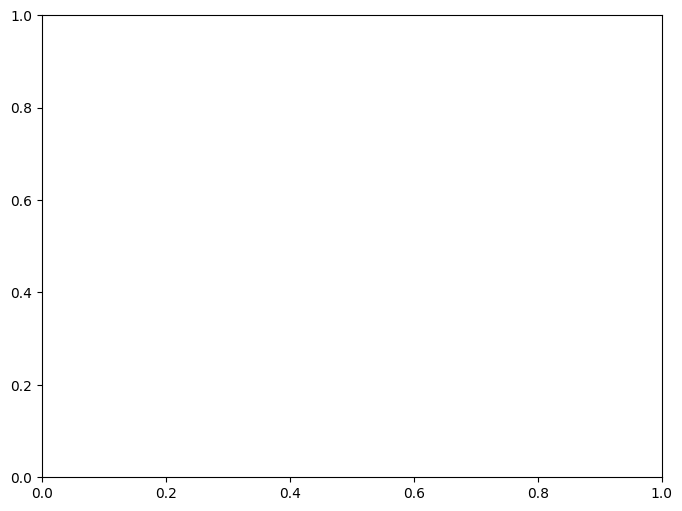

In [ ]:
# Finding the optimal number of clusters: this only ran on cloud with TPU

import matplotlib.pyplot as plt
from kmodes.kprototypes import KPrototypes

# Hypertune k using the Elbow Method
inertia = []  # To store cost for different k
max_k = 10  # You can adjust this depending on your data

for k in range(2, max_k + 1):
    try:
        kproto = KPrototypes(n_clusters=k, init='Cao', n_init=5, verbose=0)  # Limit to 5 initialization
        clusters = kproto.fit_predict(df_prepared, categorical=[df_prepared.columns.get_loc(col) for col in categorical_columns])
        inertia.append(kproto.cost_)
    except Exception as e:
        print(f"Error with k={k}: {e}")
        inertia.append(None)  # Append None if the clustering fail



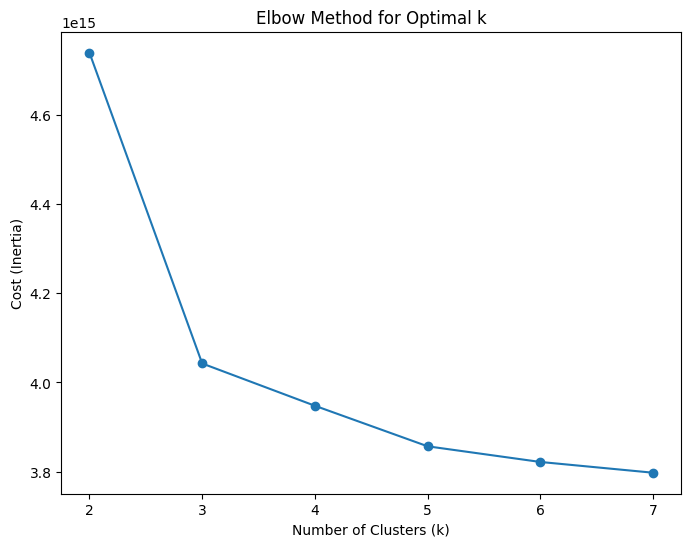

In [ ]:
# Plot the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(2, max_k + 1), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost (Inertia)')
plt.show()

# Building 5 clusters of projects

In [ ]:
# Run K-Prototypes clustering for 5 clusters: I ran this on cloud with TPU
kproto = KPrototypes(n_clusters=5, init='Cao', n_init=5, verbose=2)
clusters = kproto.fit_predict(df_prepared,categorical=[df_prepared.columns.get_loc(col) for col in categorical_columns])


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 53, ncost: 4611958018914835.0
Run: 1, iteration: 2/100, moves: 55, ncost: 3878199450939611.5
Run: 1, iteration: 3/100, moves: 28, ncost: 3861901369342614.0
Run: 1, iteration: 4/100, moves: 24, ncost: 3857719402106856.0
Run: 1, iteration: 5/100, moves: 7, ncost: 3857000368834368.5
Run: 1, iteration: 6/100, moves: 2, ncost: 3856925143872166.0
Run: 1, iteration: 7/100, moves: 0, ncost: 3856925143872166.0
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 7820, ncost: 8827025617651657.0
Run: 2, iteration: 2/100, moves: 2140, ncost: 4072467494924304.0
Run: 2, iteration: 3/100, moves: 819, ncost: 3934535041716851.0
Run: 2, iteration:

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_samples
import numpy as np

def mixed_silhouette_score(X_num, X_cat, clusters, n_clusters):
    # Calculate the pairwise distance for numerical data (Euclidean)
    num_distances = pairwise_distances(X_num, metric='euclidean')

    # Calculate the pairwise distance for categorical data (Hamming)
    cat_distances = pairwise_distances(X_cat, metric='hamming')

    # Combine the numerical and categorical distances
    # We weight them equally, but you can adjust the weight as needed
    mixed_distances = num_distances + cat_distances

    # Calculate the silhouette score using the mixed distance
    sil_samples = silhouette_samples(mixed_distances, clusters)
    sil_score = np.mean(sil_samples)

    return sil_score

# Split numerical and categorical data
numerical_data = df_prepared[numerical_columns].values

# Ensure categorical columns are converted to 'category' dtype
df_prepared[categorical_columns] = df_prepared[categorical_columns].apply(lambda col: col.astype('category'))

# Apply .cat.codes to get the integer codes for categorical columns
categorical_data = df_prepared[categorical_columns].apply(lambda col: col.cat.codes).values

# Calculate the silhouette score for the mixed data
sil_score = mixed_silhouette_score(numerical_data, categorical_data, clusters, 5)

# Output the result
print(f'Mixed Silhouette Score: {sil_score}')

Mixed Silhouette Score: 0.9781098241417262


In [ ]:
kproto.n_clusters

5

In [ ]:
# Add cluster labels to the original dataframe
df_prepared['Cluster'] = clusters

# Display the first few rows of the dataframe with clusters
print(df_prepared.head())

# Analyze cluster features
for cluster_id in range(kproto.n_clusters):
    print(f"\nCluster {cluster_id} Summary:")
    cluster_data = df_prepared[df_prepared['Cluster'] == cluster_id]

    # Show summary statistics for numerical columns
    print("Numerical Features Summary:")
    print(cluster_data[numerical_columns].describe())

    # Show mode for categorical columns
    print("\nCategorical Features Mode:")
    for col in categorical_columns:
        print(f"{col}: {cluster_data[col].mode()[0]}")


        state disable_communication country staff_pick  backers_count  \
0  successful                 False      US      False             30   
1  successful                 False      US      False            132   
2  successful                 False      US      False            152   
3  successful                 False      US      False             86   
4      failed                 False      US      False             40   

   usd_pledged         category spotlight  name_len  name_len_clean  \
0       5530.0        Thrillers      True         4               3   
1      11045.0          Jewelry      True         5               4   
2      10556.0   Country & Folk      True         8               6   
3       5816.0   Country & Folk      True         5               5   
4       2361.0  Classical Music     False        10               9   

   blurb_len  blurb_len_clean main_category staff_pick.1 show_feature_image  \
0         22               20  Film & Video        Fals

In [ ]:
import pandas as pd

# Group the data by clusters
cluster_groups = df_prepared.groupby('Cluster')

# Spot differentiating numerical features
numerical_diff = {}
for col in numerical_columns:
    inter_cluster_std = cluster_groups[col].mean().std()  # Standard deviation of cluster means
    overall_std = df_prepared[col].std()  # Overall standard deviation of the feature
    numerical_diff[col] = inter_cluster_std / overall_std  # Relative differentiation

numerical_diff = pd.DataFrame(
    sorted(numerical_diff.items(), key=lambda x: x[1], reverse=True),
    columns=['Feature', 'Relative Differentiation']
)
print("\nNumerical Features with Differentiation:")
print(numerical_diff)

# Spot differentiating categorical features
categorical_diff = {}
for col in categorical_columns:
    mode_frequencies = cluster_groups[col].apply(lambda x: x.value_counts(normalize=True).iloc[0])
    categorical_diff[col] = mode_frequencies.std()  # Standard deviation of the dominant frequency

categorical_diff = pd.DataFrame(
    sorted(categorical_diff.items(), key=lambda x: x[1], reverse=True),
    columns=['Feature', 'Cluster Variation']
)
print("\nCategorical Features with Differentiation:")
print(categorical_diff)



Numerical Features with Differentiation:
              Feature  Relative Differentiation
0            usd_goal                 23.647866
1         usd_pledged                 14.323426
2       backers_count                 10.613706
3      name_len_clean                  0.804958
4            name_len                  0.697574
5  launch_to_deadline                  0.583990
6     blurb_len_clean                  0.383260
7           blurb_len                  0.359128
8   created_to_launch                  0.060272

Categorical Features with Differentiation:
                 Feature  Cluster Variation
0          main_category           0.397573
1               category           0.289345
2                  state           0.191654
3              spotlight           0.191654
4                  video           0.189791
5                country           0.184048
6             staff_pick           0.070142
7     show_feature_image           0.048165
8  disable_communication           0.0